In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import random
import re
import statistics

plt.style.use('ggplot')

# Args

In [134]:
class PlateauSimilarities:
    intra_scores_total = []
    inter_scores_total = []

    def __init__(self, peptide, group):
        self.peptide = peptide
        self.group = group
        self.cdr3_TRAs = group.cdr3_TRA.values
        self.cdr3_TRBs = group.cdr3_TRB.values
        self.intra_scores = []
        self.inter_scores = []

    def run_plateau(self):
        def get_unique_entries(df):
            return np.where((df.cdr3_TRA==a) & (df.cdr3_TRB==b), False, True)
        
        def add_similarity_scores(ai, bi):
            mat_a = sim_tra.loc[ai, a].reset_index(drop=True).T.reset_index(drop=True).T
            mat_b = sim_trb.loc[bi, b].reset_index(drop=True).T.reset_index(drop=True).T
            return mat_a.add(mat_b)
        
        def get_intra_similarity():
            unique_entries = get_unique_entries(self.group)
            
            intra_a = self.group[unique_entries].cdr3_TRA
            intra_b = self.group[unique_entries].cdr3_TRB
            
            combined_similarity = add_similarity_scores(intra_a, intra_b)
            
            self.intra_scores.append(combined_similarity.max())
            
        def get_inter_similarity():
            sample_size = sum(get_unique_entries(self.group))
            unique_entries =  get_unique_entries(inter_chains)
            
            inter_sample = random.sample(inter_chains[unique_entries].index.to_list(), sample_size)

            inter_a = inter_chains.loc[inter_sample].cdr3_TRA
            inter_b = inter_chains.loc[inter_sample].cdr3_TRB

            combined_similarity = add_similarity_scores(inter_a, inter_b)
            
            self.inter_scores.append(combined_similarity.max())
    
        for index, (a,b) in enumerate(zip(self.cdr3_TRAs, self.cdr3_TRBs)):
            get_intra_similarity()
            get_inter_similarity()
            
        self.intra_scores_total += self.intra_scores
        self.inter_scores_total += self.inter_scores

In [32]:
class PlateauSimilarities:
    intra_scores_total = []
    inter_scores_total = []

    def __init__(self, peptide, group):
        self.peptide = peptide
        self.group = group
        self.cdr3_TRAs = group.cdr3_TRA.values
        self.cdr3_TRBs = group.cdr3_TRB.values
        self.intra_scores = []
        self.inter_scores = []

    
    def get_unique_entries(self, df):
        return np.where((df.cdr3_TRA==self.a) & (df.cdr3_TRB==self.b), False, True)

    def add_similarity_scores(self, ai, bi):
        mat_a = sim_tra.loc[ai, self.a].reset_index(drop=True).T.reset_index(drop=True).T
        mat_b = sim_trb.loc[bi, self.b].reset_index(drop=True).T.reset_index(drop=True).T
        return mat_a.add(mat_b)

    def get_intra_similarity(self):
        unique_entries = self.get_unique_entries(self.group)

        intra_a = self.group[unique_entries].cdr3_TRA
        intra_b = self.group[unique_entries].cdr3_TRB

        combined_similarity = self.add_similarity_scores(intra_a, intra_b)

        self.intra_scores.append(combined_similarity.max())

    def get_inter_similarity(self):
        sample_size = sum(self.get_unique_entries(self.group))
        unique_entries =  self.get_unique_entries(inter_chains)

        inter_sample = random.sample(inter_chains[unique_entries].index.to_list(), sample_size)

        inter_a = inter_chains.loc[inter_sample].cdr3_TRA
        inter_b = inter_chains.loc[inter_sample].cdr3_TRB

        combined_similarity = self.add_similarity_scores(inter_a, inter_b)

        self.inter_scores.append(combined_similarity.max())
            
    def run_plateau(self):
        for index, (a,b) in enumerate(zip(self.cdr3_TRAs, self.cdr3_TRBs)):
            self.index, self.a, self.b = index, a, b
            self.get_intra_similarity()
            self.get_inter_similarity()
            
        PlateauSimilarities.intra_scores_total += self.intra_scores
        PlateauSimilarities.inter_scores_total += self.inter_scores

In [3]:
class Statistics:
    def __init__(self, x1, x2):
        self.x1 = x1
        self.x2 = x2
        
    def paired_t_test(self):
        assert len(self.x1) == len(self.x2)
    
        statistic, pvalue = stats.ttest_rel(self.x1, self.x2)
    
        if (pvalue/2.0 < 0.05) & (statistic > 0) & (len(self.x1) > 9):
            self.test = True
            self.pvalue = pvalue
        else:
            self.test = False
            self.pvalue = pvalue
            
    def plot_boxplot(self, title):
        def add_number_of_observations():
            for box, lst in enumerate([self.x1, self.x2], start=1):
                median = statistics.median(lst)
                plt.text(box, median, "n: %i" %len(lst), ha='center', va='bottom')
                
        def add_significance_bar():
            #t = paired_t_test(intra_lst, inter_lst)#['pvalue']
            
            self.paired_t_test()
            if self.test & (self.pvalue < 0.05): #t['test'] and t['pvalue'] < 0.05:
                pass
            else:
                return
    
            y0 =  max(max(self.x1), max(self.x2))
            y1 = y0 * 1.02
            y2 = y0 * 1.025
            y3 = y0 * 1.03
            y4 = y0 * 1.035
    
            plt.plot([1,1,2,2], [y1,y2,y2,y1], lw=1.5, c='k')
            plt.text(1.5, y3, "p = %.6f" %self.pvalue, ha='center', va='bottom', color='k')
            plt.plot(1, y4)
        
        plt.figure(figsize=(3,5))
        plt.boxplot([self.x1, self.x2], labels=['intra', 'inter'], widths=(0.5, 0.5))
    
        plt.title(title)
        plt.xlim(0.6, 2.4)
        #plt.ylim(-0.1, 2.1)
        plt.ylabel("Similarity")
    
        add_number_of_observations()
        add_significance_bar()
        #plt.savefig(directory + 'boxplot_{}.pdf'.format(title), bbox_inches='tight')
        plt.show()

In [4]:
def get_unique_entries(df):
    return np.where((df.cdr3_TRA==a) & (df.cdr3_TRB==b), False, True)

In [5]:
def add_similarity_scores(ai,bi):
    mat_a = sim_tra.loc[ai, a].reset_index(drop=True).T.reset_index(drop=True).T
    mat_b = sim_trb.loc[bi, b].reset_index(drop=True).T.reset_index(drop=True).T
    
    return mat_a.add(mat_b)

In [6]:
def get_intra_similarity(cdr3_TRAs, cdr3_TRBs):
    unique_entries = get_unique_entries(group) #np.where((group.cdr3_TRA==a) & (group.cdr3_TRB==b), False, True)
    
    intra_a = group[unique_entries].cdr3_TRA
    intra_b = group[unique_entries].cdr3_TRB
    
    combined_similarity = add_similarity_scores(intra_a, intra_b) #np.delete(cdr3_TRAs, index), np.delete(cdr3_TRBs, index)
    
    return {'score': combined_similarity.max(),
            'fraction': sum(combined_similarity > 1.8)/len(combined_similarity)}

In [7]:
def get_inter_similarity(cdr3_TRAs, cdr3_TRBs):
    # OBS! make sure the size to sample from matches the number og unique entries intra_similarity!
    sample_size = sum(get_unique_entries(group))
    unique_entries =  get_unique_entries(inter_chains) #np.where((inter_chains.cdr3_TRA==a) & (inter_chains.cdr3_TRB==b), False, True)
    
    inter_sample = random.sample(inter_chains[unique_entries].index.to_list(), sample_size)
    
    inter_a = inter_chains.loc[inter_sample, 'cdr3_TRA'].values
    inter_b = inter_chains.loc[inter_sample, 'cdr3_TRB'].values
    
    combined_similarity = add_similarity_scores(inter_a, inter_b)
    
    return {'score': combined_similarity.max(),
            'fraction': sum(combined_similarity > 1.8)/len(combined_similarity)}

In [8]:
def paired_t_test(x1 ,x2):
    assert len(x1) == len(x2)
    
    statistic, pvalue = stats.ttest_rel(x1, x2)
    
    if (pvalue/2.0 < 0.05) & (statistic > 0) & (len(x1) > 9):
        return {'test':True, 'pvalue':pvalue}
    else:
        return {'test':False, 'pvalue':pvalue}

In [9]:
def add_number_of_observations(intra_lst, inter_lst):
    for box, lst in enumerate([intra_lst, inter_lst], start=1):
        median = statistics.median(lst)
        plt.text(box, median, "n: %i" %len(lst), ha='center', va='bottom')

In [10]:
def add_significance_bar(intra_lst, inter_lst):
    t = paired_t_test(intra_lst, inter_lst)#['pvalue']
    
    if t['test'] and t['pvalue'] < 0.05:
        pass
    else:
        return
    
    y0 =  max(max(intra_lst), max(inter_lst))
    y1 = y0 * 1.02
    y2 = y0 * 1.025
    y3 = y0 * 1.03
    y4 = y0 * 1.035

    plt.plot([1,1,2,2], [y1,y2,y2,y1], lw=1.5, c='k')
    plt.text(1.5, y3, "p = %.6f" %t['pvalue'], ha='center', va='bottom', color='k')
    plt.plot(1, y4)

In [11]:
def plot_boxplot(intra_lst, inter_lst, title):
    
    plt.figure(figsize=(3,5))
    plt.boxplot([intra_lst, inter_lst], labels=['intra', 'inter'], widths=(0.5, 0.5))
    
    plt.title(title)
    plt.xlim(0.6, 2.4)
    #plt.ylim(-0.1, 2.1)
    plt.ylabel("Similarity")
    
    add_number_of_observations(intra_lst, inter_lst)
    add_significance_bar(intra_lst, inter_lst)
    #plt.savefig(directory + 'boxplot_{}.pdf'.format(title), bbox_inches='tight')
    plt.show()

In [12]:
def plot_pieplot(significance_count, total_peptides):
    plt.pie([sum(significance_count), total_peptides-sum(significance_count)],
            labels=['significant difference', 'insignificant'],
            autopct=lambda p: '{:.0f} ({:.0f}%)'.format(p * total_peptides / 100, p))
    plt.title("Distribution of significant outcomes (%i)" %total_peptides)
    plt.savefig(directory + 'pieplot.pdf', bbox_inches='tight')
    plt.show()

In [13]:
EXP = "exp3.2.2"

In [14]:
TYPE = 'imputed_new-clonotype'

In [15]:
directory = "stats/{}/{}/".format(EXP, TYPE)

# Input

In [16]:
#INPUT_DISC = 'tcr_barcode.cleaned.imputed.nonimputed_discarded.csv'
if TYPE == 'imputed_new-clonotype':
    INPUT = 'tcr_barcode.cleaned.imputed.{}.csv'.format(EXP)
elif TYPE == 'non-imputed_new-clonotype':
    INPUT = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/" + EXP + "_CAT_IONTORRENT_KMA_AKB/tables/tcr_barcode.cleaned.csv"

In [17]:
UNIQUE_GEM = directory + 'unique_gems.lst'

In [18]:
SIM_TRA    = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/kernel_similarity_tra.{}.tab".format(EXP)
SIM_TRB    = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/kernel_similarity_trb.{}.tab".format(EXP)

In [19]:
PEPTIDES   = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp3.2.2_MHC_IONTORRENT/barcode_library/barcode_specificity_annotations.xlsx"

# Output

# Load

In [20]:
unique_gems = np.loadtxt(UNIQUE_GEM, dtype=str)

In [21]:
df = pd.read_csv(INPUT)
df = df[df.gem.isin(unique_gems)]

In [22]:
sim_tra = pd.read_csv(SIM_TRA, index_col=0)
sim_trb = pd.read_csv(SIM_TRB, index_col=0)

sim_tra = sim_tra[~sim_tra.index.duplicated()]
sim_trb = sim_trb[~sim_trb.index.duplicated()]

In [23]:
input_peptides = pd.read_excel(PEPTIDES)
total_peptides = len(input_peptides.Sequence.unique()) - 1

# Process

In [24]:
df = df.replace('unknown', np.nan).dropna(subset=['cdr3_TRA', 'cdr3_TRB'])

# Main

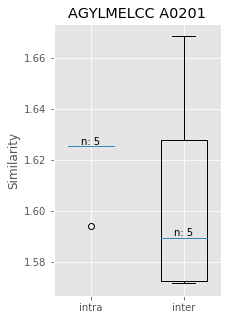

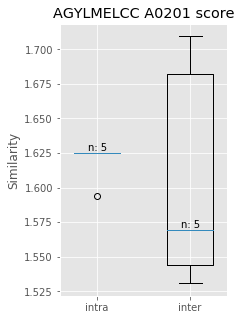

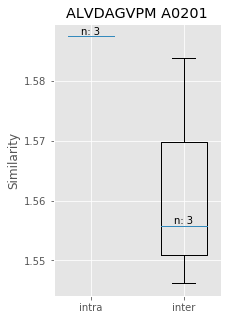

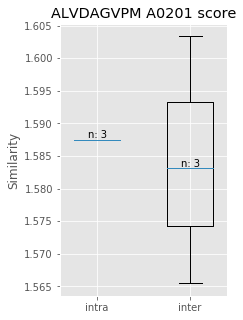

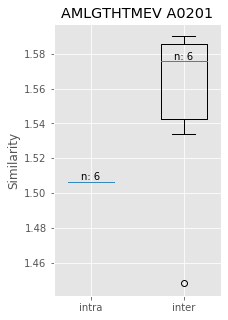

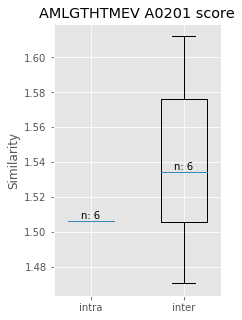

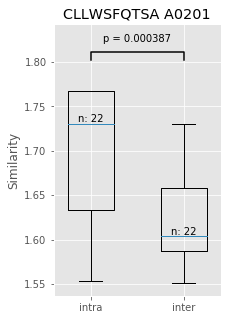

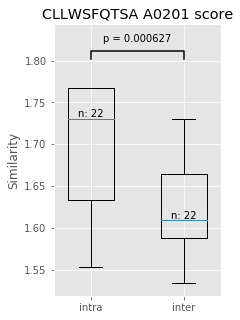

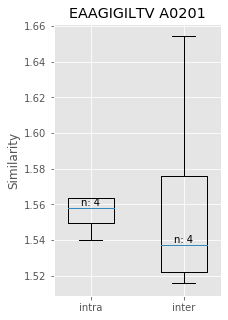

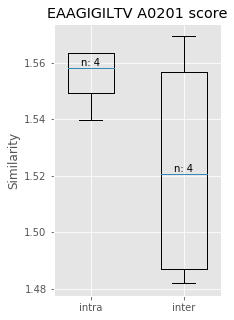

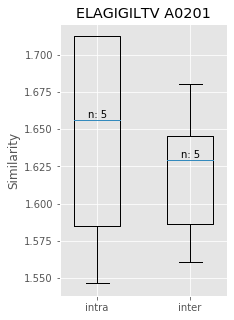

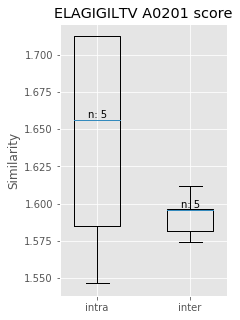

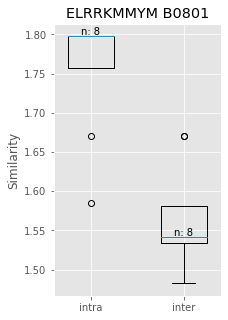

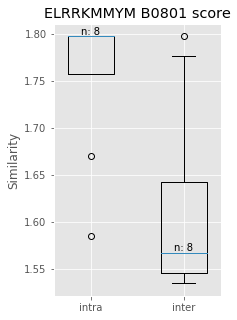

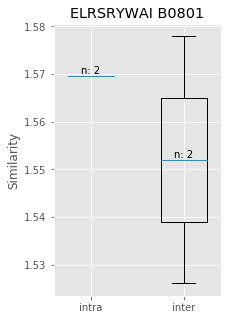

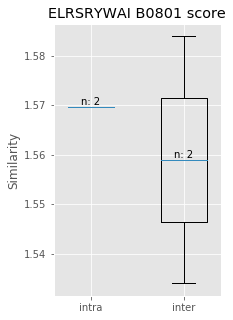

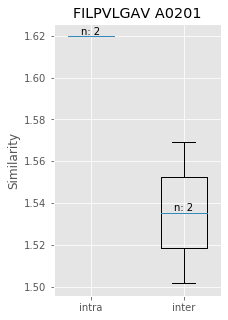

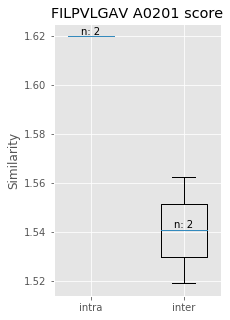

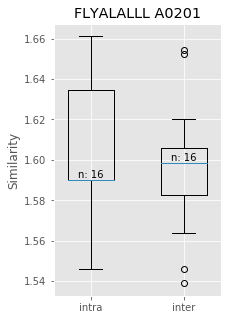

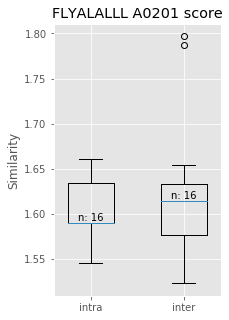

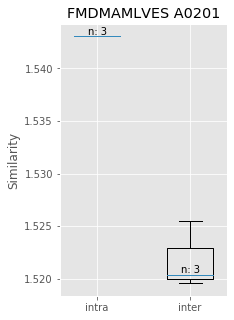

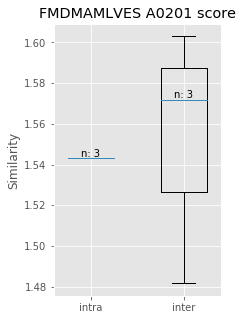

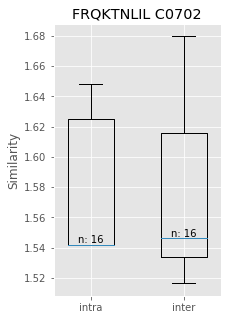

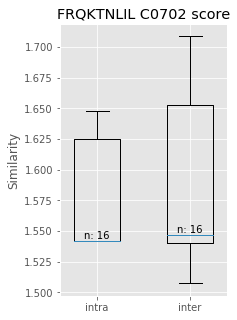

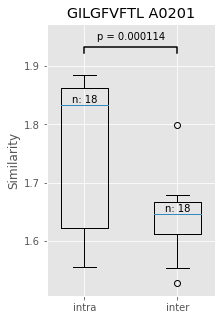

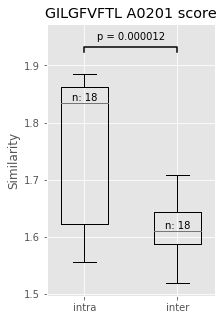

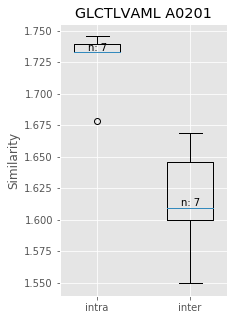

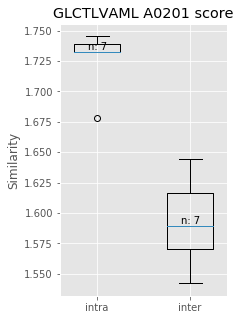

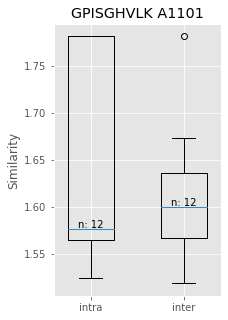

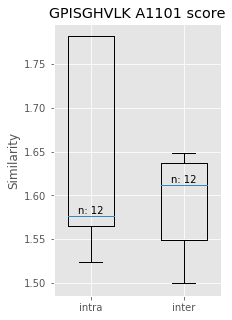

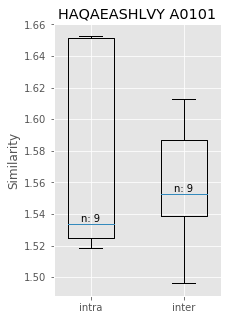

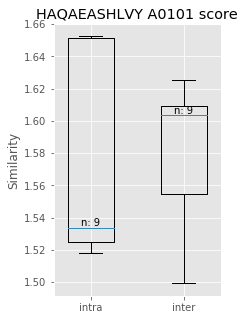

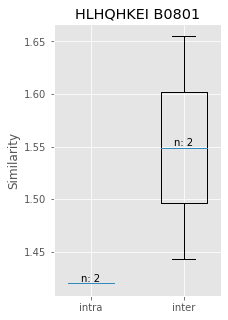

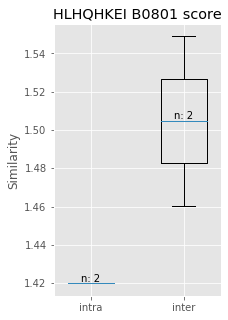

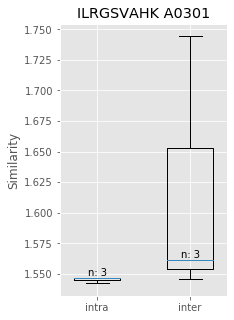

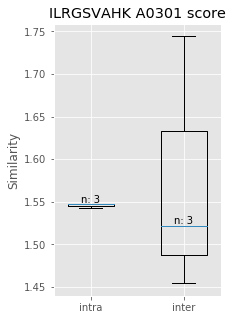

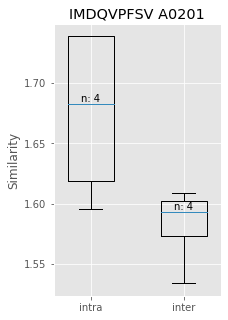

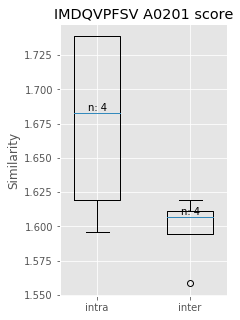

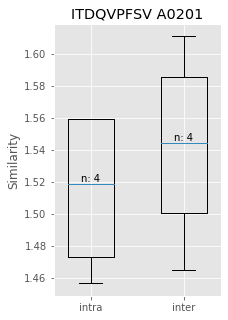

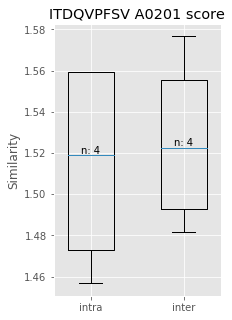

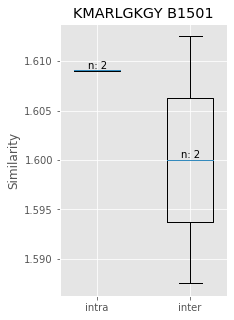

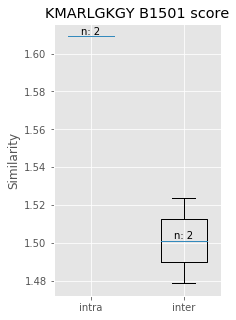

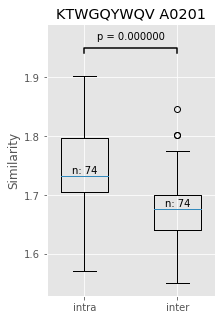

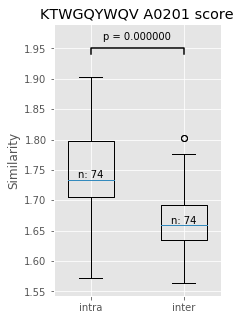

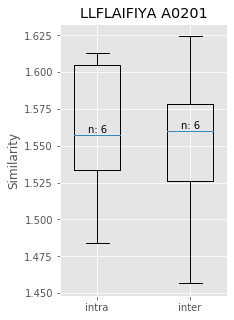

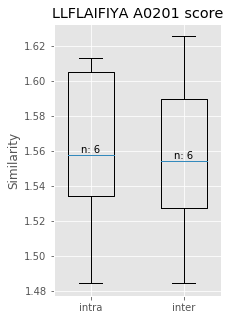

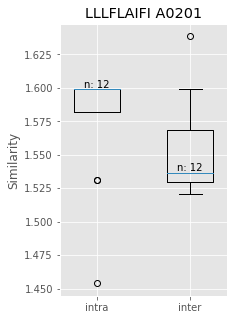

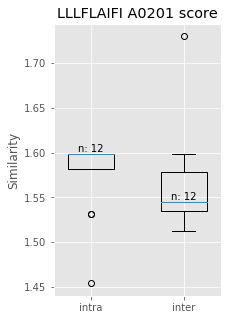

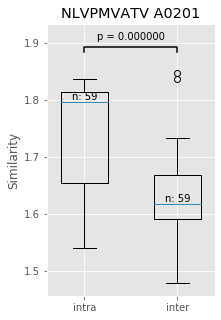

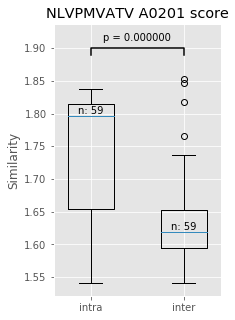

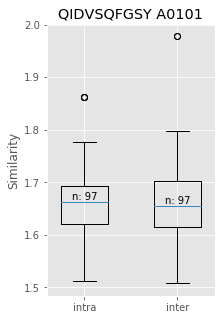

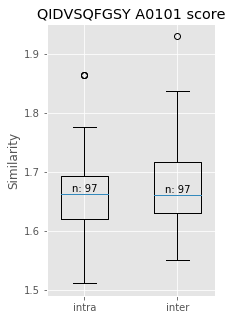

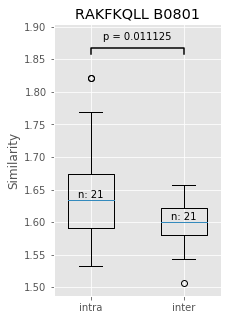

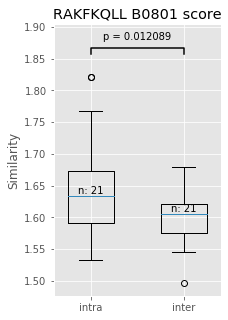

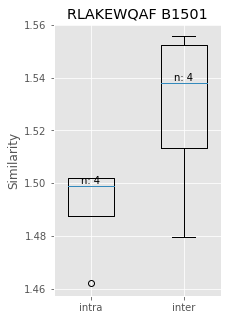

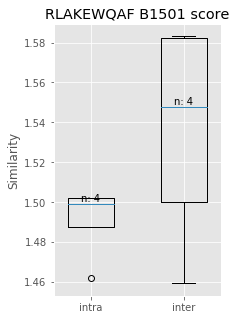

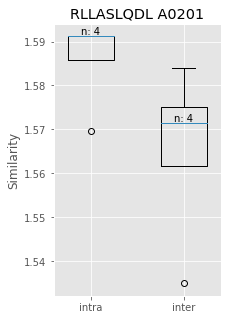

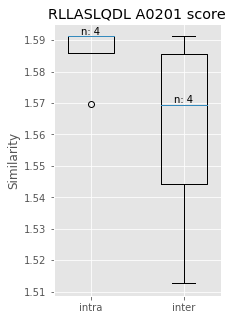

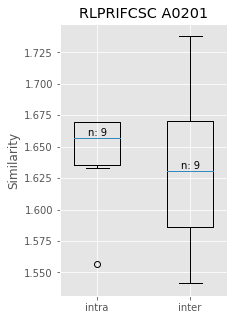

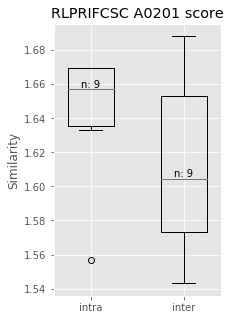

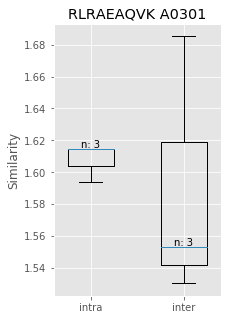

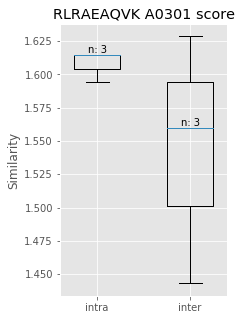

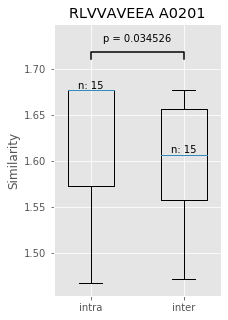

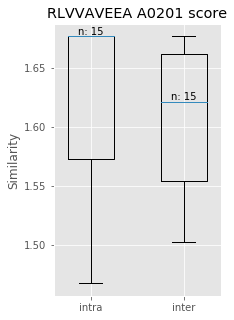

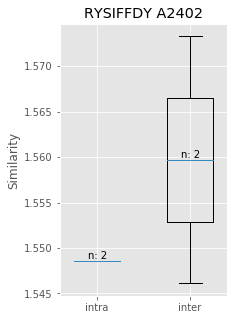

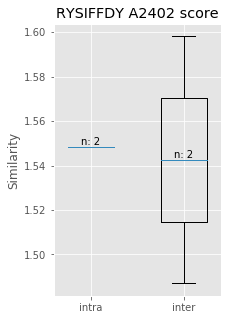

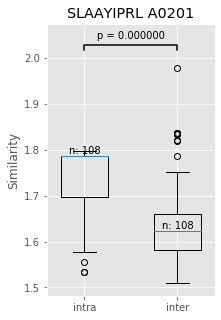

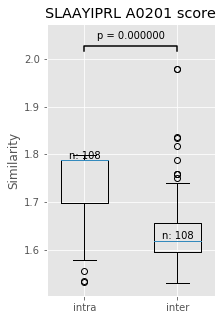

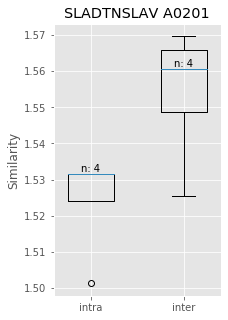

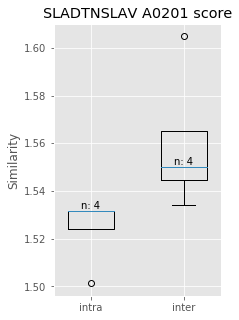

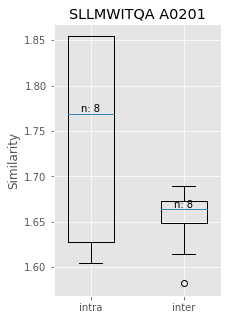

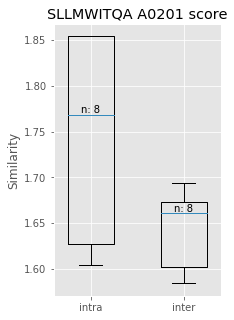

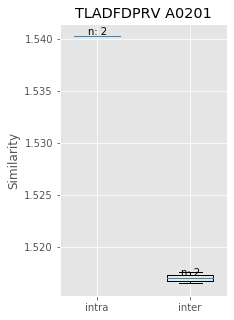

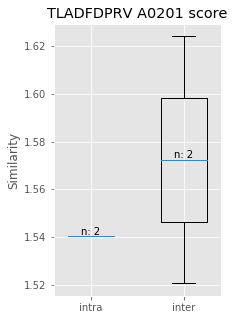

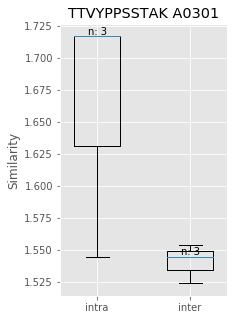

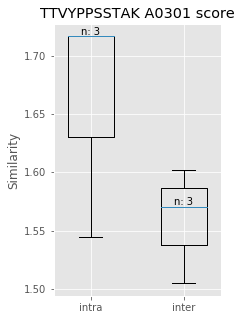

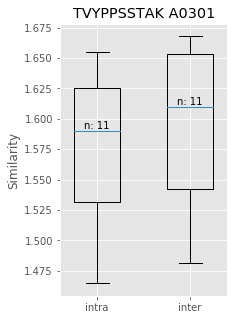

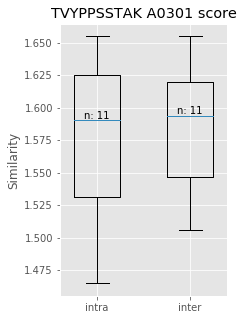

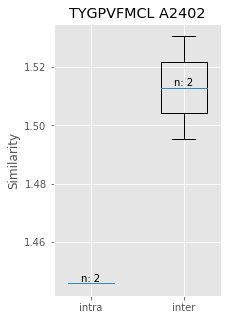

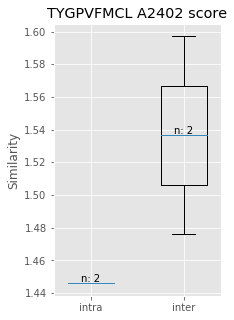

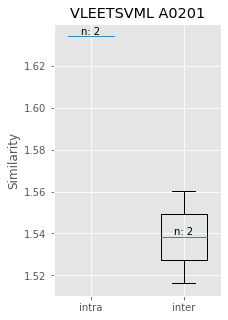

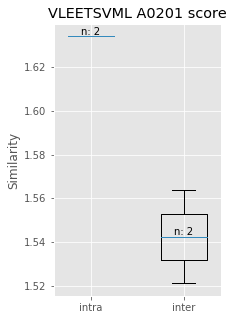

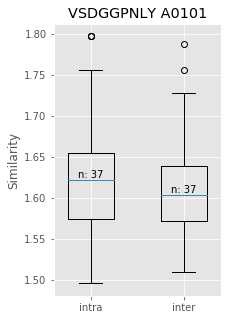

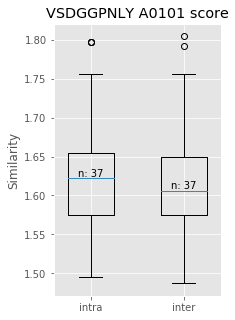

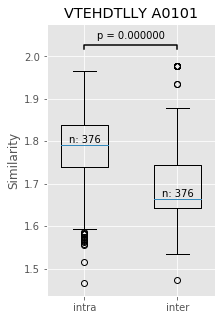

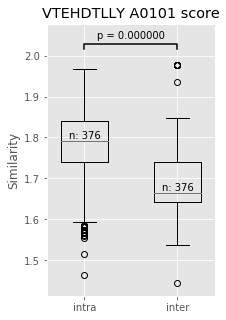

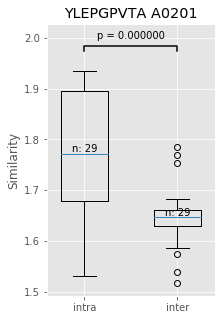

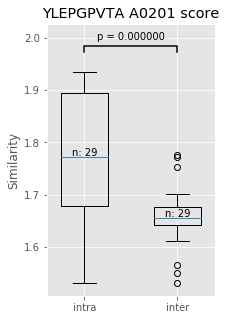

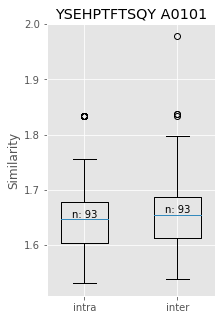

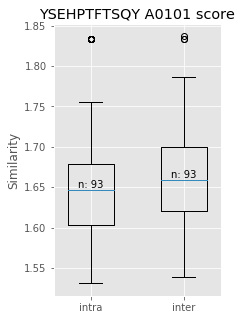

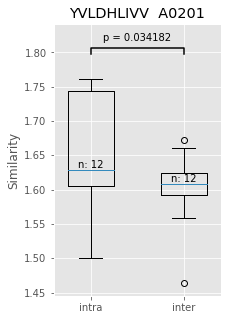

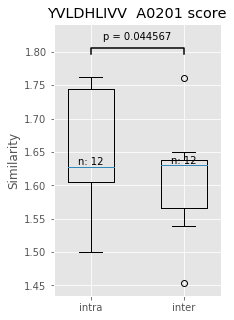

In [33]:
intra_score = list()
inter_score = list()
intra_fract = list()
inter_fract = list()

significant_scores = list()
significant_fracts = list()

for peptide, group in df.groupby('peptide_HLA'):
    if len(group) == 1:
        continue
    if len(group.drop_duplicates(['cdr3_TRA','cdr3_TRB'])) == 1:
        continue
        
    inter_chains = df.loc[df.peptide_HLA != peptide, ['cdr3_TRA', 'cdr3_TRB']]
    
    plateau = PlateauSimilarities(peptide, group)
    plateau.run_plateau()
    #plateau.plot_boxplot(plateau.intra_scores, plateau.inter_scores, plateau.peptide)
    plot_boxplot(plateau.intra_scores, plateau.inter_scores, plateau.peptide)
    
    intra_score_peptide = list()
    inter_score_peptide = list()  
    intra_fract_peptide = list()
    inter_fract_peptide = list()
    
    cdr3_TRAs = group.cdr3_TRA.values
    cdr3_TRBs = group.cdr3_TRB.values
    
    for index, (a,b) in enumerate(zip(cdr3_TRAs, cdr3_TRBs)):  
        intra = get_intra_similarity(cdr3_TRAs, cdr3_TRBs)
        inter = get_inter_similarity(cdr3_TRAs, cdr3_TRBs)
        
        intra_score_peptide.append(intra['score'])
        inter_score_peptide.append(inter['score'])
        intra_fract_peptide.append(intra['fraction'])
        inter_fract_peptide.append(inter['fraction'])
        
        intra_score.append(intra['score'])
        inter_score.append(inter['score'])
        intra_fract.append(intra['fraction'])
        inter_fract.append(inter['fraction'])
        
    plot_boxplot(intra_score_peptide, inter_score_peptide, peptide + ' score')
    #plot_boxplot(intra_fract_peptide, inter_fract_peptide, peptide + ' fraction')
        
    # Statistics
    # Calc p-value for each peptide-plateau (count number of intra significant peptide-plateaus)
    # Count fraction of GEMs above 1.8 similarity
    
    significant_scores.append(paired_t_test(intra_score_peptide, inter_score_peptide)['test'])
    significant_fracts.append(paired_t_test(intra_fract_peptide, inter_fract_peptide)['test'])

In [114]:
inst = PlateauSimilarities(peptide, group)

In [115]:
inst.run_plateau()

In [136]:
PlateauSimilarities.inter_scores_total

[]

In [117]:
inst.paired_t_test(inst.intra_scores_total, inst.inter_scores_total)

In [118]:
inst.pvalue

0.12952340306814

In [146]:
s = Statistics(PlateauSimilarities.intra_scores_total, PlateauSimilarities.inter_scores_total)

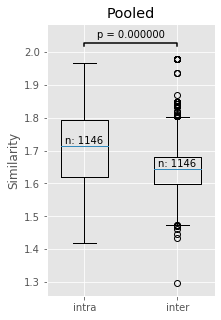

In [147]:
s.plot_boxplot('Pooled')

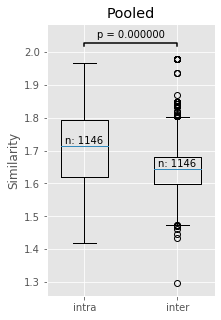

In [138]:
plot_boxplot(PlateauSimilarities.intra_scores_total, PlateauSimilarities.inter_scores_total, 'Pooled')

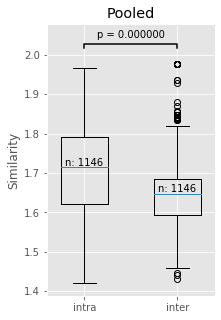

In [132]:
plot_boxplot(intra_score, inter_score, 'Pooled') 

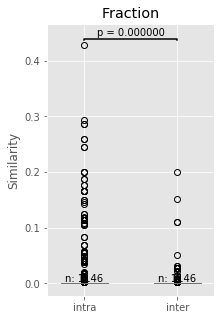

In [45]:
plot_boxplot(intra_fract, inter_fract, 'Fraction')

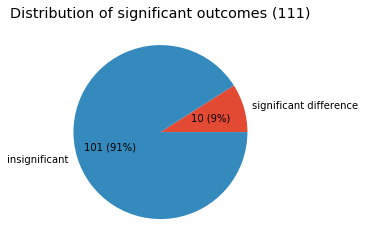

In [46]:
plot_pieplot(score_significance, total_peptides, 'Pooled')

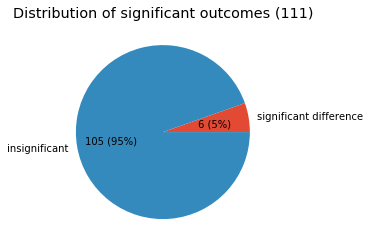

In [47]:
plot_pieplot(fract_significance, total_peptides, 'Fraction')

In [48]:
TYPE

'imputed_new-clonotype'

# All imputed

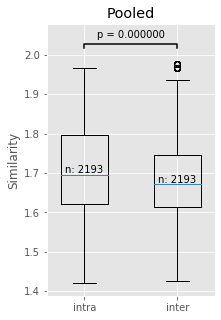

In [22]:
plot_boxplot(intra_score, inter_score, 'Pooled') 

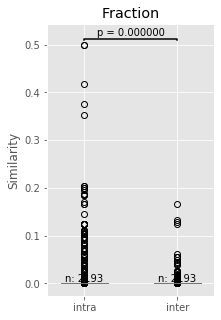

In [23]:
plot_boxplot(intra_fract, inter_fract, 'Fraction')

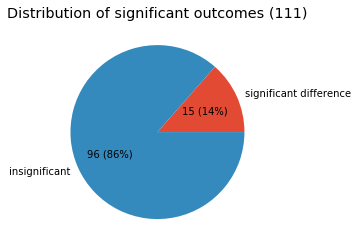

In [24]:
plot_pieplot(score_significance, total_peptides)

In [25]:
sum(score_significance) / total_peptides

0.13513513513513514

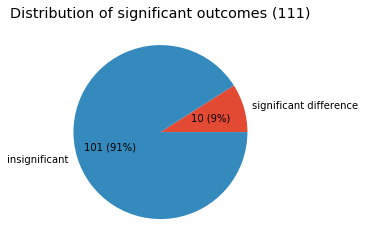

In [26]:
plot_pieplot(fract_significance, total_peptides)

In [27]:
sum(fract_significance) / total_peptides

0.09009009009009009